In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [2]:
reviewdir = '../yelp_dataset/yelp_academic_dataset_review.json'

# get first 10000 records

In [3]:
reviews = pd.read_json(reviewdir, lines=True, nrows = 10000)

In [4]:
reviews['text']

0       dr. goldberg offers everything i look for in a...
1       Unfortunately, the frustration of being Dr. Go...
2       Dr. Goldberg has been my doctor for years and ...
3       Been going to Dr. Goldberg for over 10 years. ...
4       Got a letter in the mail last week that said D...
                              ...                        
9995    we discovered this place while wanting to meet...
9996    Based on the reviews went here for Lunch, they...
9997    I've been here twice on trips to Scottsdale an...
9998    We used to love this place, but the food has g...
9999    They did not make a great first impression and...
Name: text, Length: 10000, dtype: object

In [5]:
reviews

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 2, 'cool': 1}",Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,5,2007-05-17,dr. goldberg offers everything i look for in a...,review,vcNAWiLM4dR7D2nwwJ7nCA
1,"{'funny': 0, 'useful': 2, 'cool': 0}",H1kH6QZV7Le4zqTRNxoZow,RF6UnRTtG7tWMcrO2GEoAg,2,2010-03-22,"Unfortunately, the frustration of being Dr. Go...",review,vcNAWiLM4dR7D2nwwJ7nCA
2,"{'funny': 0, 'useful': 1, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,-TsVN230RCkLYKBeLsuz7A,4,2012-02-14,Dr. Goldberg has been my doctor for years and ...,review,vcNAWiLM4dR7D2nwwJ7nCA
3,"{'funny': 0, 'useful': 0, 'cool': 0}",KBLW4wJA_fwoWmMhiHRVOA,dNocEAyUucjT371NNND41Q,4,2012-03-02,Been going to Dr. Goldberg for over 10 years. ...,review,vcNAWiLM4dR7D2nwwJ7nCA
4,"{'funny': 0, 'useful': 2, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,ebcN2aqmNUuYNoyvQErgnA,4,2012-05-15,Got a letter in the mail last week that said D...,review,vcNAWiLM4dR7D2nwwJ7nCA
...,...,...,...,...,...,...,...,...
9995,"{'funny': 0, 'useful': 2, 'cool': 1}",u_ecQBLnT9I1183SMCstaw,WK4q_zfFe23qE0j_-Ev2xw,4,2013-06-28,we discovered this place while wanting to meet...,review,_RBUU1y4yJrK0SPAd8z0-w
9996,"{'funny': 0, 'useful': 0, 'cool': 0}",98wn8JhJ08goRq1EFm_DFA,qizM3i1r0uxpBeYvzvlQFw,1,2013-07-23,"Based on the reviews went here for Lunch, they...",review,_RBUU1y4yJrK0SPAd8z0-w
9997,"{'funny': 0, 'useful': 1, 'cool': 1}",hECLdMisz3esNaUpPTGxfA,Vq-fNE60yx8rUAE7usU_zQ,2,2013-08-17,I've been here twice on trips to Scottsdale an...,review,_RBUU1y4yJrK0SPAd8z0-w
9998,"{'funny': 0, 'useful': 0, 'cool': 0}",GcNfuT79_GrreDibwGS2vQ,Hg-GUMLvNP49wdHOty9LQw,2,2013-09-06,"We used to love this place, but the food has g...",review,_RBUU1y4yJrK0SPAd8z0-w


In [6]:
import nltk

In [7]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package stopwords to C:\Users\Xinmai
[nltk_data]     Xuan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Xinmai
[nltk_data]     Xuan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Xinmai
[nltk_data]     Xuan\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords
import string
import itertools
# from wordcloud import WordCloud, ImageColorGenerator

# preprocessing data 
## delete punctuation
## convert all to lower case

In [9]:
stop_words = set(stopwords.words('english'))

In [10]:
reviews['text_process'] = reviews['text'].map(lambda x: re.sub('[^\w\s]', '', x))
reviews['text_process'] = reviews['text_process'].map(lambda x: x.lower())

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
reviews['text_process']

0       dr goldberg offers everything i look for in a ...
1       unfortunately the frustration of being dr gold...
2       dr goldberg has been my doctor for years and i...
3       been going to dr goldberg for over 10 years i ...
4       got a letter in the mail last week that said d...
                              ...                        
9995    we discovered this place while wanting to meet...
9996    based on the reviews went here for lunch they ...
9997    ive been here twice on trips to scottsdale and...
9998    we used to love this place but the food has go...
9999    they did not make a great first impression and...
Name: text_process, Length: 10000, dtype: object

# Exploratory analysis
# make a wordcloud for analysis

In [13]:
from wordcloud import WordCloud

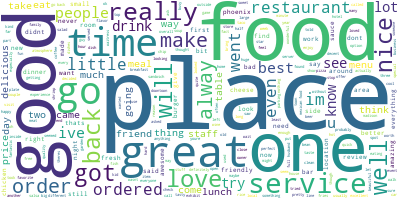

In [14]:
long_string = ','.join(list(reviews['text_process'].values))
wordcloud = WordCloud(background_color='white', max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

# Preparing data for LDA analysis

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns


In [18]:
# sns.set_style('whitegrid')
def plot_10_most_common_words(count_data, count_vectorizer):
#     import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[0] for w in count_dict]
    x_pos = np.arange(len(words))
    print(words)
    print(total_counts)
    
#     plt.figure(2, figsize=(15, 15/1.618))
#     plt.subplot(title='10 most common words')
#     sns.set_

count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(reviews['text_process'])
plot_10_most_common_words(count_data, count_vectorizer)

['place', 'food', 'good', 'great', 'like', 'just', 'time', 'really', 'service', 'dont']
[1. 2. 1. ... 1. 1. 1.]


# LDA model training and results visualization

In [21]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
from sklearn.decomposition import LatentDirichletAllocation as LDA

def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}")
        print(" ".join([words[i]
                           for i in topic.argsort()[:-n_top_words - 1: -1]
                       ]))
        
number_topics = 10
number_words = 15

lda = LDA(n_components = number_topics, n_jobs=-1)
lda.fit(count_data)

print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:
Topic 0
place great food good service love really friendly staff like time nice just ive breakfast
Topic 1
museum exhibit indian exhibits science buffet native american kids center naan adults body planetarium art
Topic 2
food sauce good place chicken fresh bbq meat thai great like just pork best delicious
Topic 3
food good like place just cheese got ordered order service time really dont didnt came
Topic 4
service time told customer just called like phone work minutes did said pizza make know
Topic 5
like just time place dont people im did said didnt know hair ive really going
Topic 6
place great phoenix time game like garden desert really fun nice just bar good center
Topic 7
food good place great fish mexican like chicken salsa chips just really service best sauce
Topic 8
store good like really place selection just little great dont time madison grocery know shop
Topic 9
room car hotel stay clean just like nice rooms staff did service work im free


D:\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# sentiment analysis

based on starts in the record, we set starts >= 3 as positive, starts < 3 as negtative

In [22]:
reviews['sentiment'] = reviews['stars'].apply(lambda score: +1 if score >= 3 else -1)

In [23]:
reviews.head()

,votes,user_id,review_id,stars,date,text,type,business_id,text_process,sentiment
0,"{'funny': 0, 'useful': 2, 'cool': 1}",Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,5,2007-05-17,dr. goldberg offers everything i look for in a...,review,vcNAWiLM4dR7D2nwwJ7nCA,dr goldberg offers everything i look for in a ...,1
1,"{'funny': 0, 'useful': 2, 'cool': 0}",H1kH6QZV7Le4zqTRNxoZow,RF6UnRTtG7tWMcrO2GEoAg,2,2010-03-22,"Unfortunately, the frustration of being Dr. Go...",review,vcNAWiLM4dR7D2nwwJ7nCA,unfortunately the frustration of being dr gold...,-1
2,"{'funny': 0, 'useful': 1, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,-TsVN230RCkLYKBeLsuz7A,4,2012-02-14,Dr. Goldberg has been my doctor for years and ...,review,vcNAWiLM4dR7D2nwwJ7nCA,dr goldberg has been my doctor for years and i...,1
3,"{'funny': 0, 'useful': 0, 'cool': 0}",KBLW4wJA_fwoWmMhiHRVOA,dNocEAyUucjT371NNND41Q,4,2012-03-02,Been going to Dr. Goldberg for over 10 years. ...,review,vcNAWiLM4dR7D2nwwJ7nCA,been going to dr goldberg for over 10 years i ...,1
4,"{'funny': 0, 'useful': 2, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,ebcN2aqmNUuYNoyvQErgnA,4,2012-05-15,Got a letter in the mail last week that said D...,review,vcNAWiLM4dR7D2nwwJ7nCA,got a letter in the mail last week that said d...,1


In [24]:
positive = reviews[reviews['sentiment'] == 1]
negative = reviews[reviews['sentiment'] == -1]

In [25]:
positive.head(5)

,votes,user_id,review_id,stars,date,text,type,business_id,text_process,sentiment
0,"{'funny': 0, 'useful': 2, 'cool': 1}",Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,5,2007-05-17,dr. goldberg offers everything i look for in a...,review,vcNAWiLM4dR7D2nwwJ7nCA,dr goldberg offers everything i look for in a ...,1
2,"{'funny': 0, 'useful': 1, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,-TsVN230RCkLYKBeLsuz7A,4,2012-02-14,Dr. Goldberg has been my doctor for years and ...,review,vcNAWiLM4dR7D2nwwJ7nCA,dr goldberg has been my doctor for years and i...,1
3,"{'funny': 0, 'useful': 0, 'cool': 0}",KBLW4wJA_fwoWmMhiHRVOA,dNocEAyUucjT371NNND41Q,4,2012-03-02,Been going to Dr. Goldberg for over 10 years. ...,review,vcNAWiLM4dR7D2nwwJ7nCA,been going to dr goldberg for over 10 years i ...,1
4,"{'funny': 0, 'useful': 2, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,ebcN2aqmNUuYNoyvQErgnA,4,2012-05-15,Got a letter in the mail last week that said D...,review,vcNAWiLM4dR7D2nwwJ7nCA,got a letter in the mail last week that said d...,1
6,"{'funny': 0, 'useful': 0, 'cool': 0}",jE5xVugujSaskAoh2DRx3Q,kMu0knsSUFW2DZXqKkGWlg,5,2014-01-02,Top notch doctor in a top notch practice. Can'...,review,vcNAWiLM4dR7D2nwwJ7nCA,top notch doctor in a top notch practice cant ...,1


In [26]:
negative.head(5)

,votes,user_id,review_id,stars,date,text,type,business_id,text_process,sentiment
1,"{'funny': 0, 'useful': 2, 'cool': 0}",H1kH6QZV7Le4zqTRNxoZow,RF6UnRTtG7tWMcrO2GEoAg,2,2010-03-22,"Unfortunately, the frustration of being Dr. Go...",review,vcNAWiLM4dR7D2nwwJ7nCA,unfortunately the frustration of being dr gold...,-1
5,"{'funny': 0, 'useful': 0, 'cool': 0}",Qrs3EICADUKNFoUq2iHStA,_ePLBPrkrf4bhyiKWEn4Qg,1,2013-04-19,I don't know what Dr. Goldberg was like before...,review,vcNAWiLM4dR7D2nwwJ7nCA,i dont know what dr goldberg was like before ...,-1
37,"{'funny': 0, 'useful': 1, 'cool': 0}",6ViJPCbqIAIq5HPy7anIEw,IaONpXIHNtIBrmMU668OdQ,1,2012-03-10,"Went here for lunch with two co-workers, check...",review,uGykseHzyS5xAMWoN6YUqA,went here for lunch with two coworkers checked...,-1
41,"{'funny': 0, 'useful': 0, 'cool': 0}",l6PKBSi09-Qi0v3T9IZwCw,by1vl1hP-gZMSn0ChXlGWA,2,2014-01-01,My boyfriend and I came here to have breakfast...,review,uGykseHzyS5xAMWoN6YUqA,my boyfriend and i came here to have breakfast...,-1
55,"{'funny': 1, 'useful': 4, 'cool': 1}",8ITVDdfK07owxCA1x878Vw,YKl9cQsRT2J3_osn_U-fJw,2,2007-09-10,My arch-enemy.\n\nI've never encountered a com...,review,oLctHIA1AxmsgOuu4dM6Vw,my archenemy\n\nive never encountered a compan...,-1


# set wordcloud for different sentiment

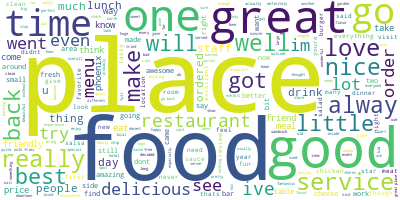

In [29]:
# for positive
long_string = ','.join(list(positive['text_process'].values))
wordcloud = WordCloud(background_color='white', max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

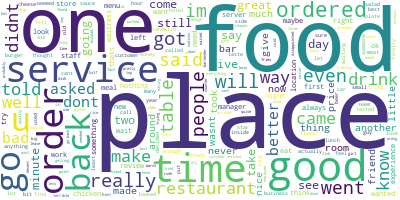

In [30]:
# for negative
long_string = ','.join(list(negative['text_process'].values))
wordcloud = WordCloud(background_color='white', max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

# LDA for positive sentiment

In [31]:
pos_count_vectorizer = CountVectorizer(stop_words='english')
count_data = pos_count_vectorizer.fit_transform(positive['text_process'])

number_topics = 10
number_words = 15

lda = LDA(n_components = number_topics, n_jobs=-1)
lda.fit(count_data)

print("Topics found via LDA:")
print_topics(lda, pos_count_vectorizer, number_words)

Topics found via LDA:
Topic 0
great food place good service bar nice friendly staff room breakfast really time game hotel
Topic 1
fish fry service like friday place really good perch love beer cod lake night going
Topic 2
place like just great did time really ive im museum people nice know going art
Topic 3
time place great good game really center like just kids dont parking fun youre little
Topic 4
garden desert gardens beautiful botanical just time plants exhibit chihuly day place indian visit like
Topic 5
place good food just time like lunch im really little ive thai love great dont
Topic 6
good food place like great chicken just really sauce best service delicious cheese ordered try
Topic 7
great time cheese dont service good wine just place car want staff store ive know
Topic 8
car wash care minutes eggs dr time did took room little breakfast like didnt need
Topic 9
like place really nice great best just dont music know club love old beer area


D:\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# LDA for negative sentiment

In [33]:
neg_count_vectorizer = CountVectorizer(stop_words='english')
count_data = neg_count_vectorizer.fit_transform(negative['text_process'])

number_topics = 10
number_words = 15

lda = LDA(n_components = number_topics, n_jobs=-1)
lda.fit(count_data)

print("Topics found via LDA:")
print_topics(lda, neg_count_vectorizer, number_words)

Topics found via LDA:
Topic 0
food good place time like just really service got chicken ordered dont order went better
Topic 1
store service said customer told went car just called time like room business asked did
Topic 2
like just place good food sauce bbq didnt time ordered really service ribs sandwich dont
Topic 3
came food service table place just got time went didnt like car minutes told order
Topic 4
food place good like just ordered service fish better order mexican cheese im didnt got
Topic 5
time just appointment like day told im service order didnt make work location check new
Topic 6
place food really like bar good did going dont great time service say people old
Topic 7
time room just like im exhibit going know told old people new exhibits way money
Topic 8
minutes just like food place wait dont service told order said didnt bar good time
Topic 9
place time service people dont just make customer im location food phone told called going
